<a href="https://colab.research.google.com/github/inathanms/Evolucao_Software_2025-2_goose/blob/main/Evolucao_Software_2025_2_goose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Fetch the last 100 closed pull request comments from the "block/goose" GitHub repository using the GitHub API, excluding bot comments. Map the following acronyms in the comments to their full forms: WIP -> Work In Progress, LGTM -> Looks Good To Me, PR -> Pull Request, MR -> Merge Request, IMO -> In My Opinion, IMHO -> In My Humble Opinion, AFAIK -> As Far As I Know, FYI -> For Your Information, Nit -> Nitpick, TL;DR -> Too Long; Didn't Read, TBD -> To Be Defined / To Be Determined, ACK -> Acknowledge, PTAL -> Please Take Another Look. Display the resulting list of comments.

## Set up github api access

### Subtask:
Obtain a GitHub personal access token with the necessary permissions to read repository data.


## Fetch closed pull requests

### Subtask:
Use the GitHub API to retrieve the last 100 closed pull requests for the `block/goose` repository.


**Reasoning**:
Import the necessary library and set up the API request to fetch the last 100 closed pull requests.



In [1]:
import requests
from google.colab import userdata

# Define the repository details
repo_owner = "block"
repo_name = "goose"

# GitHub API endpoint for pull requests
api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/pulls"

# Get GitHub token from environment variable
github_token = userdata.get("GITHUB_ACCESS_TOKEN")

# Set up the request parameters
params = {
    "state": "closed",
    "per_page": 100,
    "sort": "created",
    "direction": "desc"
}

# Set up the request headers with authentication
headers = {
    "Authorization": f"token {github_token}",
    "Accept": "application/vnd.github.v3+json"
}

# Make the GET request to the GitHub API
response = requests.get(api_url, params=params, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    closed_pull_requests = response.json()
    print(f"Successfully retrieved {len(closed_pull_requests)} closed pull requests.")
else:
    print(f"Error: {response.status_code} - {response.text}")
    closed_pull_requests = []
closed_pull_requests

Successfully retrieved 100 closed pull requests.


[{'url': 'https://api.github.com/repos/block/goose/pulls/5428',
  'id': 2957145937,
  'node_id': 'PR_kwDOMneZ986wQndR',
  'html_url': 'https://github.com/block/goose/pull/5428',
  'diff_url': 'https://github.com/block/goose/pull/5428.diff',
  'patch_url': 'https://github.com/block/goose/pull/5428.patch',
  'issue_url': 'https://api.github.com/repos/block/goose/issues/5428',
  'number': 5428,
  'state': 'closed',
  'locked': False,
  'title': 'testing tetrate with sonnet',
  'user': {'login': 'michaelneale',
   'id': 14976,
   'node_id': 'MDQ6VXNlcjE0OTc2',
   'avatar_url': 'https://avatars.githubusercontent.com/u/14976?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/michaelneale',
   'html_url': 'https://github.com/michaelneale',
   'followers_url': 'https://api.github.com/users/michaelneale/followers',
   'following_url': 'https://api.github.com/users/michaelneale/following{/other_user}',
   'gists_url': 'https://api.github.com/users/michaelneale/gists{/gist_id}',


## Fetch comments for each pr

### Subtask:
For each retrieved pull request, fetch its comments using the GitHub API.


**Reasoning**:
Iterate through the retrieved pull requests and fetch comments for each using the provided comments URL in the pull request object.



In [2]:
all_comments = []

if closed_pull_requests:
    for pr in closed_pull_requests:
        # Fetch regular comments
        comments_url = pr["_links"]["comments"]["href"]
        comments_response = requests.get(comments_url, headers=headers)

        if comments_response.status_code == 200:
            all_comments.extend(comments_response.json())
        else:
            print(f"Error fetching comments for PR {pr['number']}: {comments_response.status_code} - {comments_response.text}")

        # Fetch review comments
        review_comments_url = pr["_links"]["review_comments"]["href"]
        review_comments_response = requests.get(review_comments_url, headers=headers)

        if review_comments_response.status_code == 200:
            all_comments.extend(review_comments_response.json())
        else:
            print(f"Error fetching review comments for PR {pr['number']}: {review_comments_response.status_code} - {review_comments_response.text}")
else:
    print("No closed pull requests were retrieved in the previous step.")

## Filter out bot comments

### Subtask:
Identify and remove comments made by bots.

**Reasoning**:
Iterate through the fetched comments and exclude those where the `type` of the author is 'Bot'.

In [3]:
human_comments = [comment for comment in all_comments if comment['user']['type'] != 'Bot']

print(f"Filtered out {len(all_comments) - len(human_comments)} bot comments.")

Filtered out 65 bot comments.


## Extract and store comments

### Subtask:
Collect the text of the remaining comments into a list.

**Reasoning**:
Iterate through the filtered comments and extract the `body` (the comment text) from each comment object.

In [4]:
comment_texts = [comment['body'] for comment in human_comments]

print(f"Extracted {len(comment_texts)} human comments.")

Extracted 249 human comments.


## Map acronyms

### Subtask:
Replace the specified acronyms in the collected comments with their full forms.

**Reasoning**:
Iterate through the extracted comment texts and use string replacement to substitute the acronyms with their corresponding full forms.

In [5]:
acronym_map = {
    "WIP": "Work In Progress",
    "LGTM": "Looks Good To Me",
    "PR": "Pull Request",
    "MR": "Merge Request",
    "IMO": "In My Opinion",
    "IMHO": "In My Humble Opinion",
    "AFAIK": "As Far As I Know",
    "FYI": "For Your Information",
    "Nit": "Nitpick",
    "TL;DR": "Too Long; Didn't Read",
    "TBD": "To Be Defined / To Be Determined",
    "ACK": "Acknowledge",
    "PTAL": "Please Take Another Look"
}

mapped_comments = []
for comment in comment_texts:
    mapped_comment = comment
    for acronym, full_form in acronym_map.items():
        # Use regex to replace whole words only to avoid replacing parts of other words
        import re
        mapped_comment = re.sub(r'\b' + re.escape(acronym) + r'\b', full_form, mapped_comment, flags=re.IGNORECASE)
    mapped_comments.append(mapped_comment)

print("Mapped acronyms in comments.")

Mapped acronyms in comments.


In [6]:
# Truncate comments to a maximum length that the model can handle
# The error message suggests a limit around 512 characters, but the specific model might have a slightly different limit.
# Let's set a more conservative limit to avoid the error.
max_comment_length = 512  # Keep the previously set limit, but the model seems to have an issue with it.
truncated_comments = [comment[:max_comment_length] for comment in mapped_comments]

print(f"Truncated {len(truncated_comments)} comments to a maximum length of {max_comment_length} characters.")

Truncated 249 comments to a maximum length of 512 characters.


## Display results

### Subtask:
Show the processed list of comments.

**Reasoning**:
Display the `mapped_comments` list to show the final result.

In [7]:
# @title
for comment in truncated_comments:
    print("\n-----\n")
    print(comment)


-----

Note: The only smoke test failing should pass once https://github.com/block/goose/pull/5384 is merged

> ✗ Subrecipe names (--no-session)

-----

wow bullish on the mdash 😂

-----

this is duped code

-----

the above seems more complicated than it should be. we already check if the history file exists. if we also check whether the old history exists we can then just load from old if new doesn't exist and delete old when new does exist

-----

no need to check on history_loaded here I think

-----

I'd probably go with something like:

let load_from = [&history_file, &old_history_file]
    .iter()
    .find(|f| f.exists());

if let Some(file) = load_from {
    if let Err(err) = editor.load_history(file) {
        eprintln!("Warning: Failed to load command history: {}", err);
    }
}

-----

Thanks, closing this we already have a contributing guide here https://github.com/block/goose/blob/main/CONTRIBUTING.md

-----

should this be session, singular?

-----

@katzdave can we pul

# Task
Perform sentiment analysis on the `processed_comments` column of the DataFrame using Hugging Face's `transformers` library.

## Install necessary libraries

### Subtask:
Install the `transformers` library from Hugging Face.


**Reasoning**:
Install the `transformers` library using pip.



In [8]:
%pip install transformers

**Reasoning**:
Import the necessary function and create the sentiment analysis pipeline.



## Perform sentiment analysis

### Subtask:
Iterate through the processed comments and use the loaded model to predict the sentiment of each comment.


**Reasoning**:
Initialize an empty list and iterate through the mapped comments to perform sentiment analysis on each using the loaded pipeline, storing the predicted label.



In [9]:
def perform_sentiment_analysis(comments, pipeline):
    sentiments = []
    scores = []

    for comment in truncated_comments:
        # The pipeline returns a list of dictionaries, e.g., [{'label': 'POSITIVE', 'score': 0.99}]
        result = pipeline(comment)
        # Extract the 'label' and 'score' from the result
        sentiment_label = result[0]['label']
        sentiment_score = result[0]['score']
        sentiments.append(sentiment_label)
        scores.append(sentiment_score)

    return sentiments, scores

    print(f"Performed sentiment analysis on {len(sentiments)} comments.")

## Display results

### Subtask:
Show the comments along with their predicted sentiment.


**Reasoning**:
Iterate through the comments and their sentiments and print them.



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_distribution(sentiments, scores):
    # Create a DataFrame to store comments, sentiments, and scores
    sentiment_df = pd.DataFrame({
        'comment': truncated_comments,
        'sentiment': sentiments,
        'score': scores
    })

    # Calculate the average sentiment score
    average_score = sentiment_df['score'].mean()
    print(f"Overall average sentiment score: {average_score:.4f}")

    # Calculate the average sentiment score for each sentiment type
    average_scores_by_sentiment = sentiment_df.groupby('sentiment')['score'].mean()
    print("\nAverage sentiment score by sentiment type:")
    display(average_scores_by_sentiment)

    # Visualize the distribution of sentiment labels
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')
    plt.title('Distribution of Sentiment Labels')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    print("")

    # Visualize the distribution of sentiment scores
    plt.figure(figsize=(8, 6))
    sns.histplot(sentiment_df['score'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

### cardiffnlp/twitter-roberta-base-sentiment-latest

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


Overall average sentiment score: 0.7359

Average sentiment score by sentiment type:


,score
sentiment,
negative,0.679455
neutral,0.745577
positive,0.741611


/tmp/ipython-input-1195476696.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')


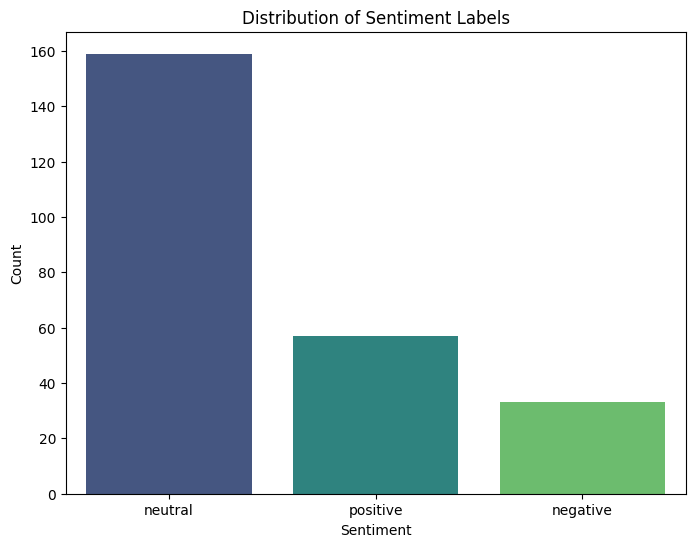

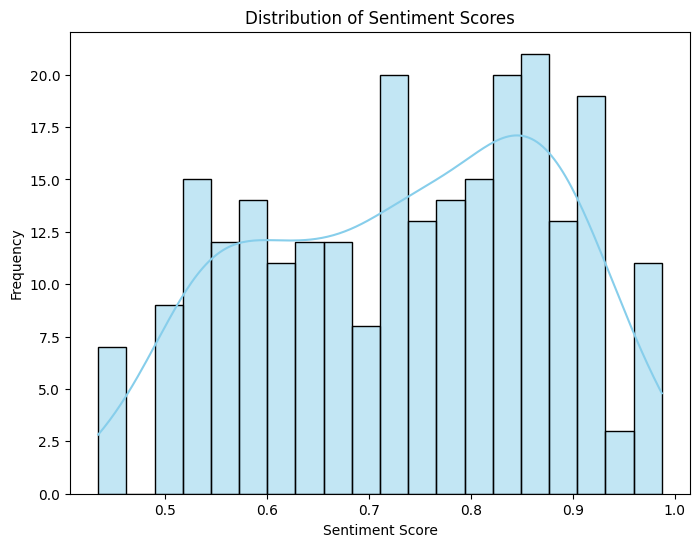

In [11]:
from transformers import pipeline

sentiment_analyzer_cardiffnlp = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiments_cardiffnlp, scores_cardiffnlp = perform_sentiment_analysis(truncated_comments, sentiment_analyzer_cardiffnlp)
plot_sentiment_distribution(sentiments_cardiffnlp, scores_cardiffnlp)

### lxyuan/distilbert-base-multilingual-cased-sentiments-student

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


Overall average sentiment score: 0.5739

Average sentiment score by sentiment type:


,score
sentiment,
negative,0.528672
neutral,0.446940
positive,0.635347


/tmp/ipython-input-1195476696.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')


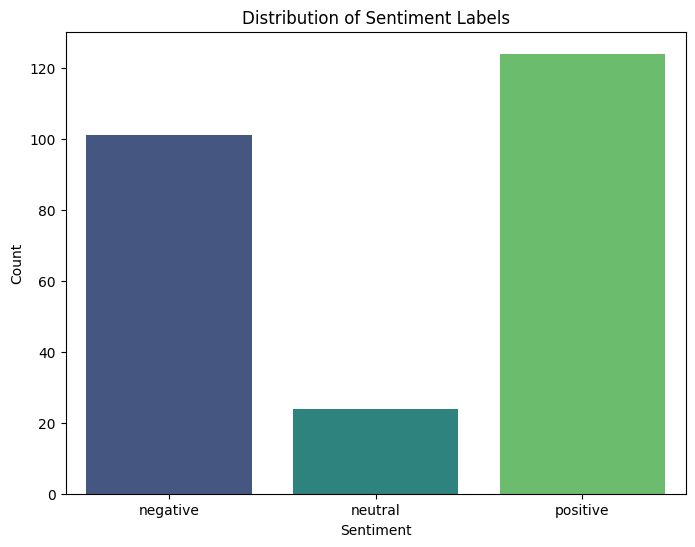

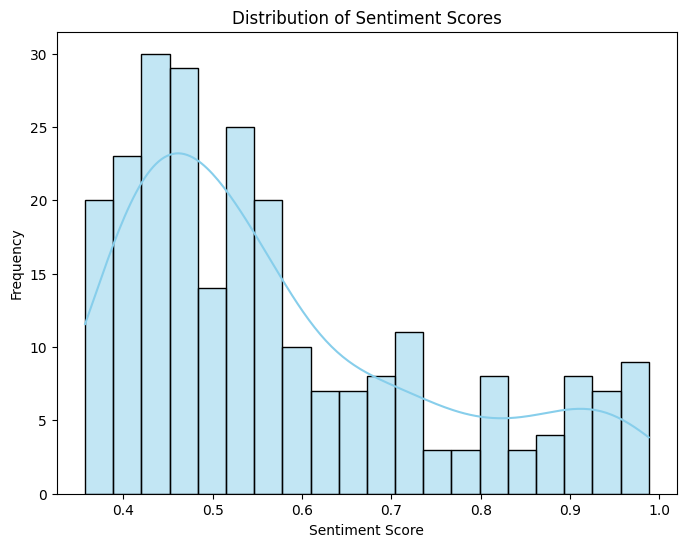

In [12]:
sentiment_analyzer_lxyuan = pipeline(model="lxyuan/distilbert-base-multilingual-cased-sentiments-student")
sentiments_lxyuan, scores_lxyuan = perform_sentiment_analysis(truncated_comments, sentiment_analyzer_lxyuan)
plot_sentiment_distribution(sentiments_lxyuan, scores_lxyuan)

### citizenlab/twitter-xlm-roberta-base-sentiment-finetunned

config.json:   0%|          | 0.00/992 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


Overall average sentiment score: 0.9371

Average sentiment score by sentiment type:


,score
sentiment,
Negative,0.757004
Neutral,0.957947
Positive,0.864348


/tmp/ipython-input-1195476696.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')


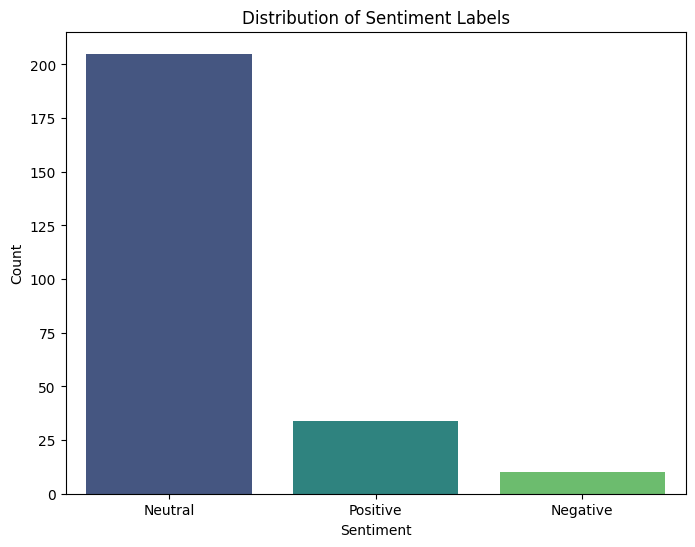

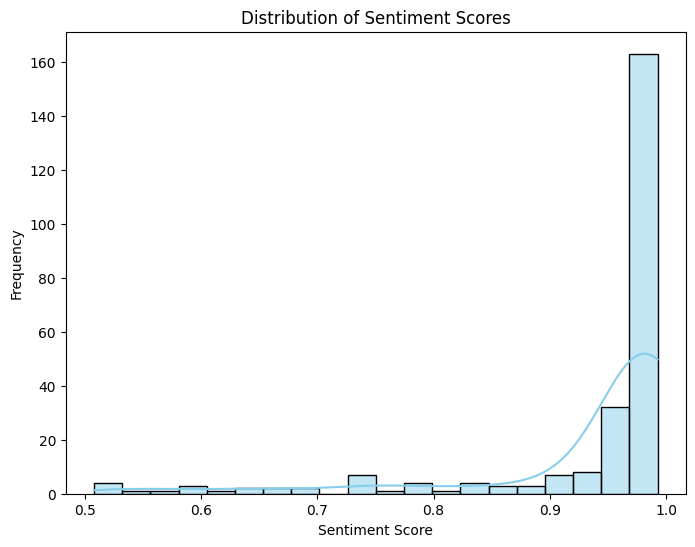

In [14]:
sentiment_analyzer_citizenlab = pipeline(model="citizenlab/twitter-xlm-roberta-base-sentiment-finetunned")
sentiments_citizenlab, scores_citizenlab = perform_sentiment_analysis(truncated_comments, sentiment_analyzer_citizenlab)
plot_sentiment_distribution(sentiments_citizenlab, scores_citizenlab)

## Global Average Sentiment Scores

Global average sentiment score across all models:


,sentiment,score
0,negative,0.579083
1,neutral,0.839311
2,positive,0.699733


/tmp/ipython-input-2585321134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='score', data=global_average_scores, palette='viridis')


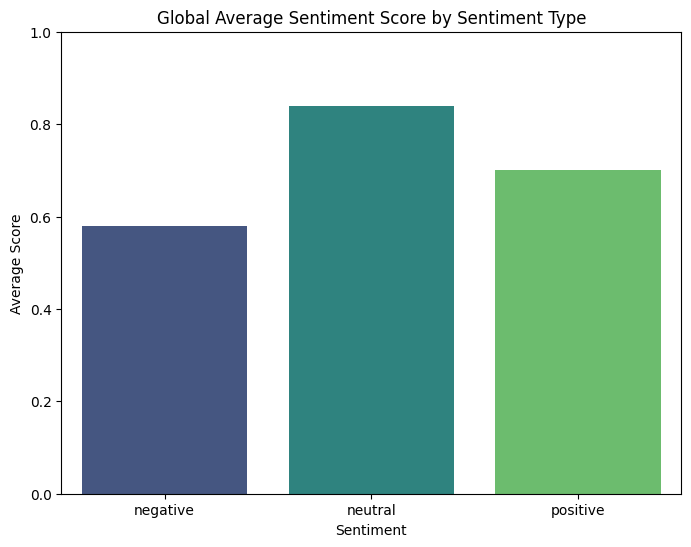

In [17]:
# Calculate the global average sentiment score for each sentiment type
global_average_scores = combined_df.groupby('sentiment')['score'].mean().reset_index()

print("Global average sentiment score across all models:")
display(global_average_scores)

# Visualize the global average sentiment scores
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='score', data=global_average_scores, palette='viridis')
plt.title('Global Average Sentiment Score by Sentiment Type')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.ylim(0, 1) # Sentiment scores are between 0 and 1
plt.show()

## Compare Sentiment Analysis Results with Visualizations

Let's compare the sentiment analysis results from the three models by looking at the average scores for each sentiment category and visualizing these comparisons.

Average sentiment score by model and sentiment type:


,model,sentiment,score
0,cardiffnlp,negative,0.679455
1,cardiffnlp,neutral,0.745577
2,cardiffnlp,positive,0.741611
3,citizenlab,negative,0.757004
4,citizenlab,neutral,0.957947
5,citizenlab,positive,0.864348
6,lxyuan,negative,0.528672
7,lxyuan,neutral,0.446940
8,lxyuan,positive,0.635347


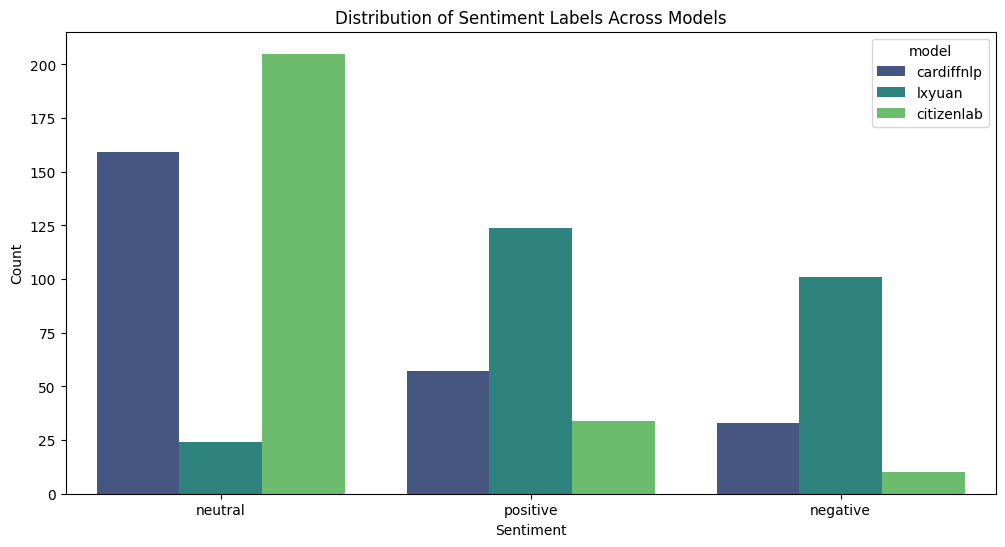

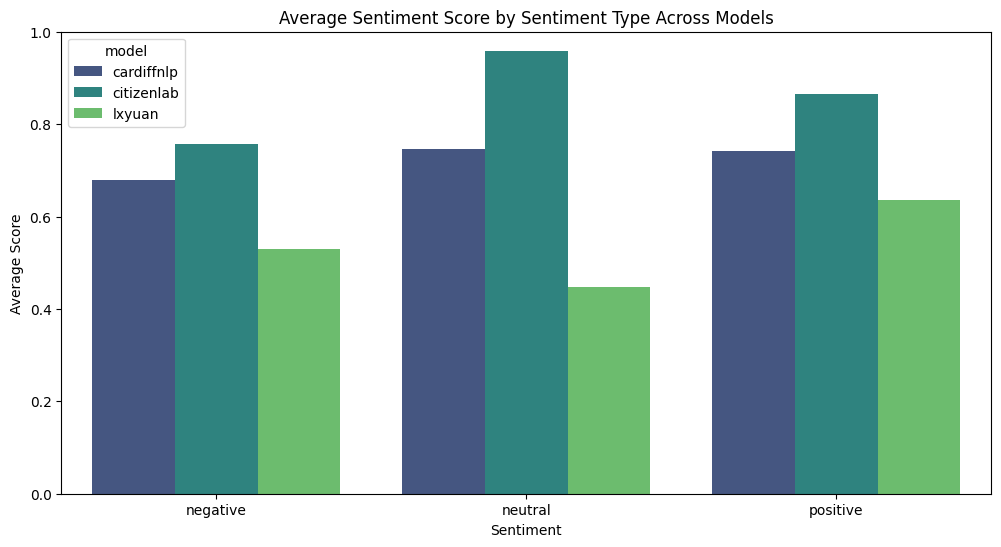

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrames for each model's results
df_cardiffnlp = pd.DataFrame({'sentiment': sentiments_cardiffnlp, 'score': scores_cardiffnlp, 'model': 'cardiffnlp'})
df_lxyuan = pd.DataFrame({'sentiment': sentiments_lxyuan, 'score': scores_lxyuan, 'model': 'lxyuan'})
df_citizenlab = pd.DataFrame({'sentiment': sentiments_citizenlab, 'score': scores_citizenlab, 'model': 'citizenlab'})

# Convert sentiment labels to lowercase for the citizenlab model
df_citizenlab['sentiment'] = df_citizenlab['sentiment'].str.lower()


# Combine the DataFrames
combined_df = pd.concat([df_cardiffnlp, df_lxyuan, df_citizenlab])

# Calculate average sentiment scores by model and sentiment
average_scores_combined = combined_df.groupby(['model', 'sentiment'])['score'].mean().reset_index()

print("Average sentiment score by model and sentiment type:")
display(average_scores_combined)

# Visualize the distribution of sentiment labels across models
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', hue='model', data=combined_df, palette='viridis')
plt.title('Distribution of Sentiment Labels Across Models')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize the average sentiment scores by sentiment type across models
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment', y='score', hue='model', data=average_scores_combined, palette='viridis')
plt.title('Average Sentiment Score by Sentiment Type Across Models')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.ylim(0, 1) # Sentiment scores are between 0 and 1
plt.show()